# Computer Vision 1: Assignment 1

Task 2

Group Number 43

Marek Drwal

17.11.2025

## setup

In [1]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt

## read

In [2]:
img_pth = 'visual_attention_ds.png'

In [3]:
img = ski.io.imread(img_pth)

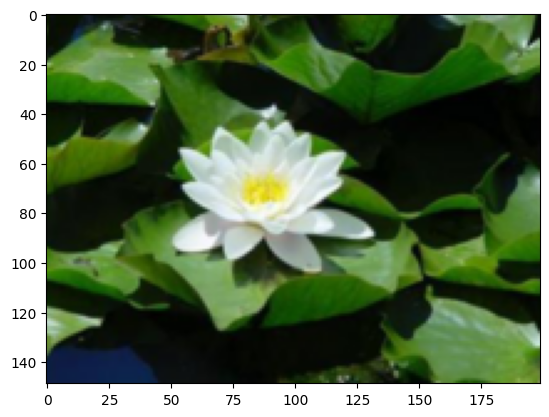

In [4]:
plt.imshow(img)

## convert

In [5]:
img = ski.color.rgba2rgb(img)

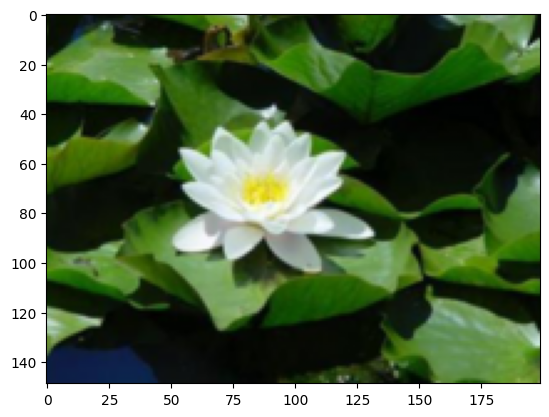

In [6]:
plt.imshow(img)

In [7]:
img = ski.color.rgb2gray(img)

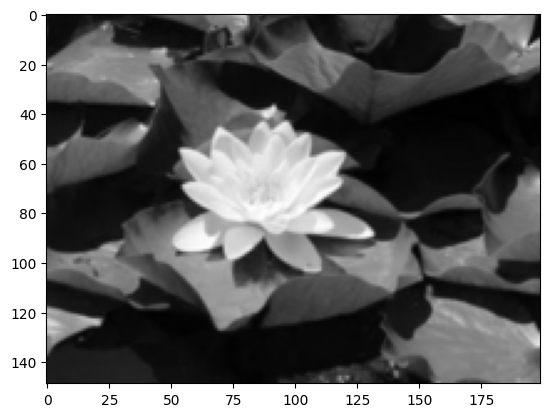

In [8]:
plt.imshow(img, cmap=plt.cm.gray)

## integral img

In [9]:
ii = ski.transform.integral_image(img)
ii

array([[1.07000000e-01, 1.65839216e-01, 2.21612157e-01, ...,
        5.68624933e+01, 5.70552933e+01, 5.70956557e+01],
       [2.00836471e-01, 3.22436471e-01, 4.38186667e-01, ...,
        1.09715171e+02, 1.10063788e+02, 1.10153472e+02],
       [2.80973725e-01, 4.55541961e-01, 6.22310196e-01, ...,
        1.59156518e+02, 1.59620038e+02, 1.59749511e+02],
       ...,
       [3.74655329e+01, 7.37578059e+01, 1.09155577e+02, ...,
        8.29938292e+03, 8.34052819e+03, 8.38045299e+03],
       [3.75783361e+01, 7.39873565e+01, 1.09502143e+02, ...,
        8.33716463e+03, 8.37879730e+03, 8.41921088e+03],
       [3.76880133e+01, 7.42100969e+01, 1.09842174e+02, ...,
        8.37276935e+03, 8.41487541e+03, 8.45581919e+03]])

In [10]:
ii.shape

(149, 199)

In [11]:
img.shape

(149, 199)

## contrast maps

In [12]:
def compute_contrast_map(ii, s_size, c_size):
    sc_img = np.zeros_like(ii)
    y_dim, x_dim = ii.shape
    s_size //= 2
    c_size //= 2
    s = c = 0
    for y in range(s_size, y_dim-s_size):
        for x in range(s_size, x_dim-s_size):
            st = (y-s_size, x-s_size)
            en = (y+s_size, x+s_size)
            s = ski.transform.integrate(ii, st, en)[0]

            st = (y-c_size, x-c_size)
            en = (y+c_size, x+c_size)
            c = ski.transform.integrate(ii, st, en)[0]

            sc_img[y][x] = s-c
    return sc_img

### 11x11-21x21

(np.float64(-0.5), np.float64(198.5), np.float64(148.5), np.float64(-0.5))

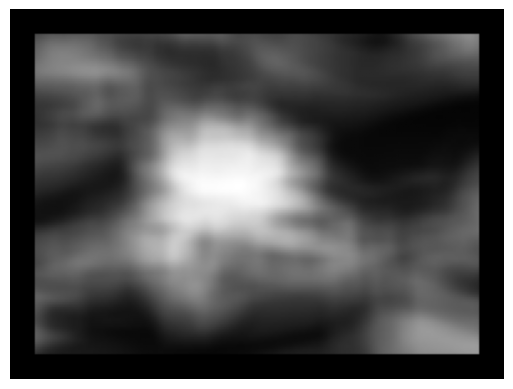

In [13]:
c_size = 11
s_size = 21
plt.imshow(compute_contrast_map(ii, s_size, c_size), cmap=plt.cm.gray)
plt.axis('off')

In [14]:
np.divide((c_size, c_size), ii.shape)

array([0.0738255 , 0.05527638])

In [15]:
np.divide((s_size, s_size), ii.shape)

array([0.1409396 , 0.10552764])

balanced between image details/original form and extra saliency info

### 3x3-7x7

(np.float64(-0.5), np.float64(198.5), np.float64(148.5), np.float64(-0.5))

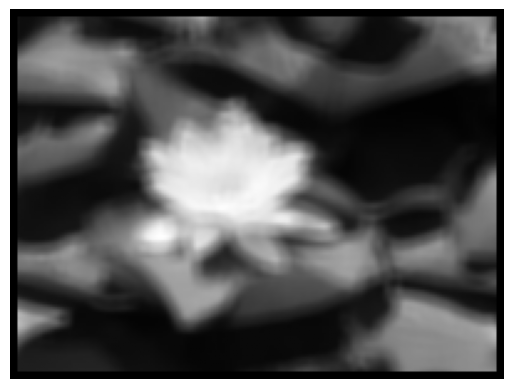

In [16]:
c_size = 3
s_size = 7
plt.imshow(compute_contrast_map(ii, s_size, c_size), cmap=plt.cm.gray)
plt.axis('off')

In [17]:
np.divide((c_size, c_size), ii.shape)

array([0.02013423, 0.01507538])

In [18]:
np.divide((s_size, s_size), ii.shape)

array([0.04697987, 0.03517588])

smaller window, more details, nice artistic effect

### 31x31-51x51

(np.float64(-0.5), np.float64(198.5), np.float64(148.5), np.float64(-0.5))

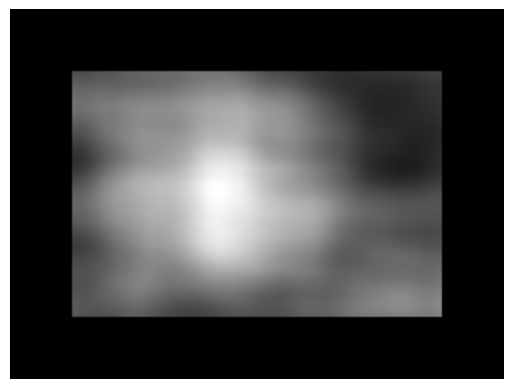

In [19]:
c_size = 31
s_size = 51
plt.imshow(compute_contrast_map(ii, s_size, c_size), cmap=plt.cm.gray)
plt.axis('off')

In [20]:
np.divide((c_size, c_size), ii.shape)

array([0.20805369, 0.15577889])

In [21]:
np.divide((s_size, s_size), ii.shape)

array([0.34228188, 0.25628141])

large window, few details, very general summary for intensity changes